In [1]:
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.extensions import U1Gate, UnitaryGate, ZGate, XGate
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit_aer import *

import qiskit.quantum_info as qi


import numpy as np
from math import pi,log2,sqrt


# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
# service = QiskitRuntimeService(channel="ibm_quantum")

In [2]:
# The function to be searched. k is the marked value
def f(k):
    def f(x):
        if x==k:
            return 1
        return 0
    return f

# Auxiliary ket and bra
def ket_reg(n,x):
    if x < 0 or x > 2**n-1:
        return(-1)
    output = [[0] for i in range(x)]+[[1]]+ [[0] for i in range(2**n-x-1)]
    return(np.matrix(output))

def bra_reg(n,x):
    return(ket_reg(n,x).H)


# Phase oracle, directly defined as 
def PhaseOracle(n,f):
    unitary = np.matrix([[0 for i in range(2**(n+1))] for j in range(2**(n+1))])
    for b in range(2**n):
        if f(b)==0:
            unitary += np.kron(np.matrix([[1,0],[0,1]]),ket_reg(n,b) @ bra_reg(n,b))
        else:
            unitary += np.kron(np.matrix([[1,0],[0,-1]]),ket_reg(n,b) @ bra_reg(n,b))
    return UnitaryGate(unitary,label='Phase Oracle')

In [3]:
def D(n) : 
    qc = QuantumCircuit(0, 0)

    qub = []

    for i in range(0, n):
        qi = QuantumRegister(1, i)
        qub.append(qi)
        qc.add_register(qub[i])

    for i in range(n) :
        qc.h(qub[i])

    qc.barrier()

    # A

    for i in range(n) :
        qc.x(qub[i])


    qc.append(ZGate().control(n-1),list(range(n))) 

    for i in range(n) :
        qc.x(qub[i])

    qc.barrier()

    for i in range(n) :
        qc.h(qub[i])

    return qc


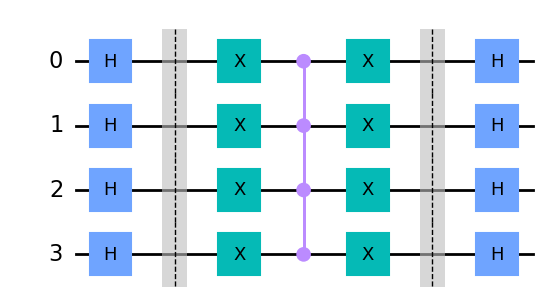

In [4]:
D(4).draw(output='mpl')
# Grover's operator circuit

In [5]:
PhaseOracle(0,f)


Instruction(name='unitary', num_qubits=1, num_clbits=0, params=[array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])])

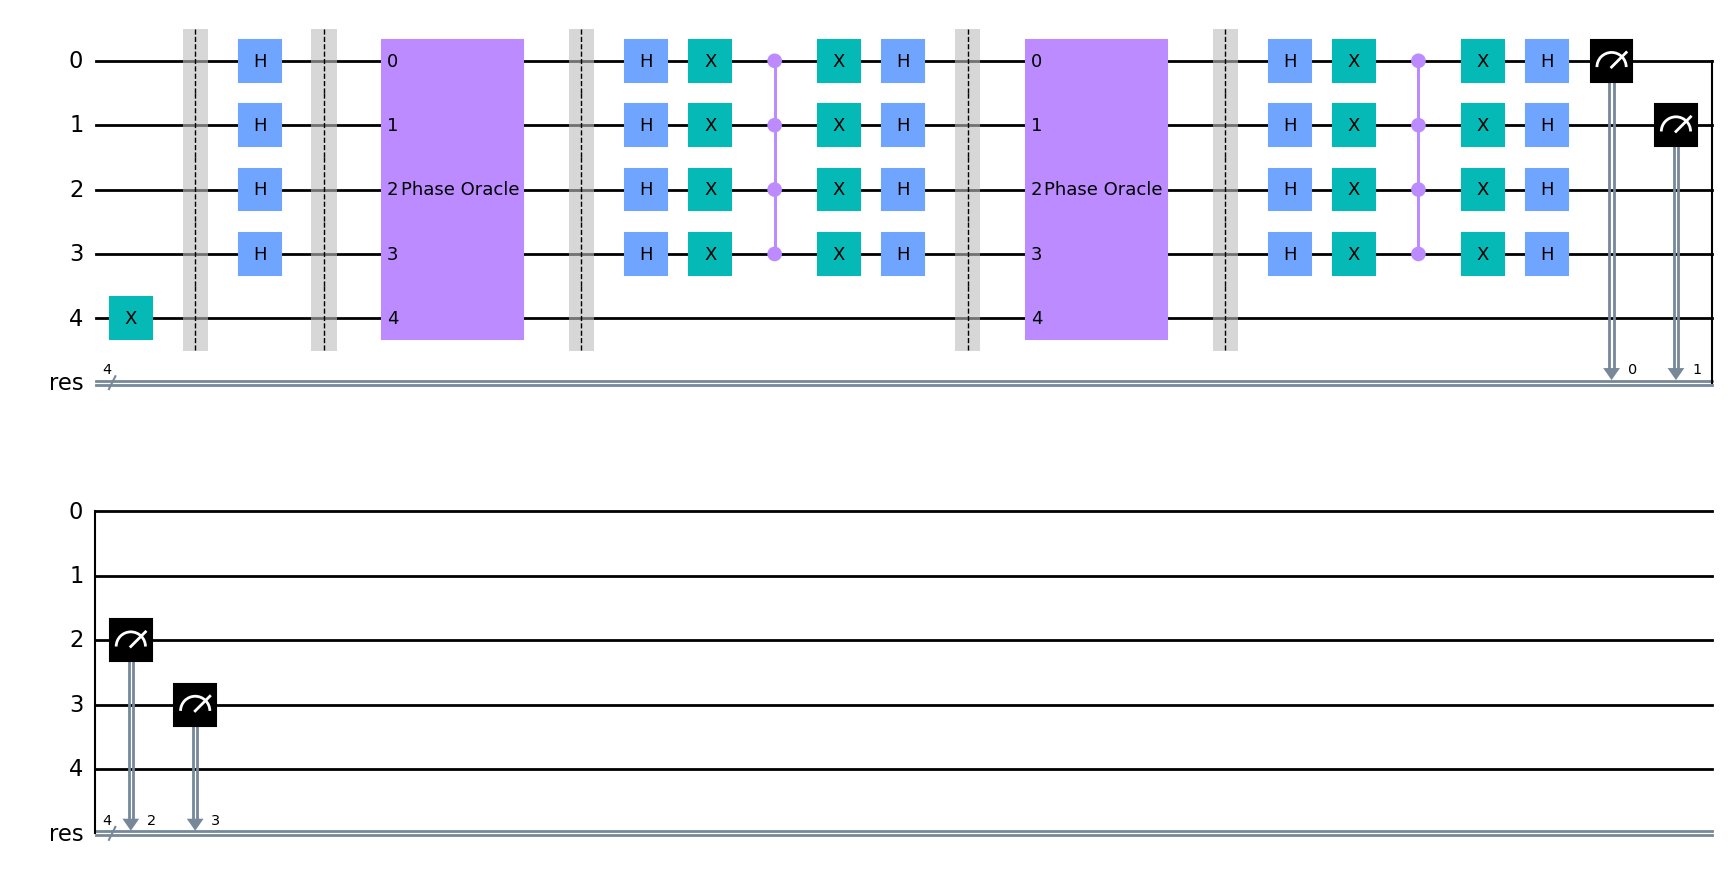

In [9]:
n = 4
qc = QuantumCircuit(0, 0)
cr = ClassicalRegister(n, "res")
qc.add_register(cr)

K = round(pi/4 * sqrt(n))

qub = []

for i in range(0, n + 1):
    qi = QuantumRegister(1, i)
    qub.append(qi)
    qc.add_register(qub[i])
    
qc.x(qub[n])

qc.barrier()

# qc.h(qub[n])

for i in range(n) :
    qc.h(qub[i])
    
for c in range(K):    
    
    qc.barrier()
    qc.append(PhaseOracle(n,f), list(range(n + 1)))

    qc.barrier()


    for i in range(n) :
        qc.h(qub[i])

#     qc.barrier()

    for i in range(n) :
        qc.x(qub[i])


    qc.append(ZGate().control(n-1),list(range(n))) 

    for i in range(n) :
        qc.x(qub[i])

#     qc.barrier()

    for i in range(n) :
        qc.h(qub[i])
        
qc.measure(list(range(n)), cr) 
qc.draw(output='mpl')


In [10]:
def Grover(n, f): # grover function for 1 marked item
    K=1
    qc = QuantumCircuit(0, 0)
    cr = ClassicalRegister(n, "res")
    qc.add_register(cr)
    iter = round(pi/4 * sqrt(2**n/K))

    qub = []

    for i in range(0, n + 1):
        qi = QuantumRegister(1, i)
        qub.append(qi)
        qc.add_register(qub[i])

    qc.x(qub[n])

    qc.barrier()

    # qc.h(qub[n])

    for i in range(n) :
        qc.h(qub[i])

    for c in range(iter):    

        qc.barrier()
        qc.append(PhaseOracle(n,f), list(range(n + 1)))

        qc.barrier()


        for i in range(n) :
            qc.h(qub[i])

    #     qc.barrier()

        for i in range(n) :
            qc.x(qub[i])


        qc.append(ZGate().control(n-1),list(range(n))) 

        for i in range(n) :
            qc.x(qub[i])

    #     qc.barrier()

        for i in range(n) :
            qc.h(qub[i])

    qc.measure(list(range(n)), cr) 
    return qc


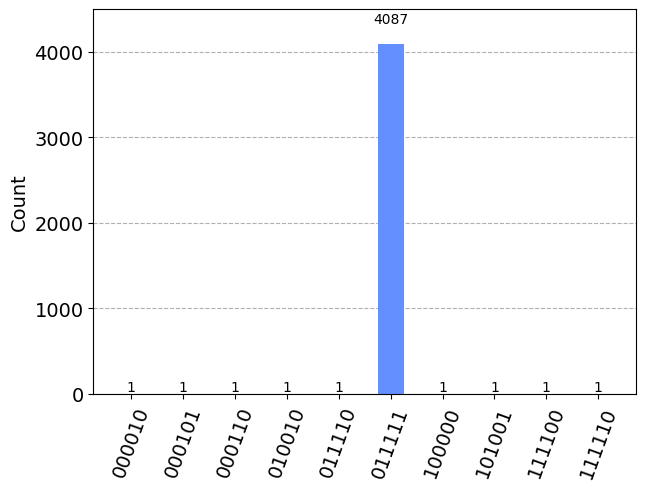

In [11]:
aer_sim = Aer.get_backend('aer_simulator')

result = execute(Grover(6,f(31)), aer_sim,shots=4096).result()
# Here 6 is the number of qubits, not counting the auxiliary
statistics = result.get_counts()
plot_histogram(statistics)

# The value with the highest count is the marked item of the function, the solution

In [12]:
# The function to be searched. k is the marked value
def f(k):
    def output_f(x):
            if x in k:
                return 1
            return 0
    return output_f

# Auxiliary ket and bra
def ket_reg(n,x):
    if x < 0 or x > 2**n-1:
        
        return(-1)
    output = [[0] for i in range(x)]+[[1]]+ [[0] for i in range(2**n-x-1)]
    return(np.matrix(output))

def bra_reg(n,x):
    return(ket_reg(n,x).H)


# Phase oracle, directly defined as 
def PhaseOracle(n,f):
    unitary = np.matrix([[0 for i in range(2**(n+1))] for j in range(2**(n+1))])
    for b in range(2**n):
        if f(b)==0:
            unitary += np.kron(np.matrix([[1,0],[0,1]]),ket_reg(n,b) @ bra_reg(n,b))
        else:
            unitary += np.kron(np.matrix([[1,0],[0,-1]]),ket_reg(n,b) @ bra_reg(n,b))
    return UnitaryGate(unitary,label='Phase Oracle')

In [13]:
def Grover(n, f, K): # grover function for K marked items
    qc = QuantumCircuit(0, 0)
    cr = ClassicalRegister(n, "res")
    qc.add_register(cr)
    iter = round(pi/4 * sqrt(2**n/K))

    qub = []

    for i in range(0, n + 1):
        qi = QuantumRegister(1, i)
        qub.append(qi)
        qc.add_register(qub[i])

    qc.x(qub[n])

    qc.barrier()

    # qc.h(qub[n])

    for i in range(n) :
        qc.h(qub[i])

    for c in range(iter):    

        qc.barrier()
        qc.append(PhaseOracle(n,f), list(range(n + 1)))

        qc.barrier()


        for i in range(n) :
            qc.h(qub[i])

    #     qc.barrier()

        for i in range(n) :
            qc.x(qub[i])


        qc.append(ZGate().control(n-1),list(range(n))) 

        for i in range(n) :
            qc.x(qub[i])

    #     qc.barrier()

        for i in range(n) :
            qc.h(qub[i])

    qc.measure(list(range(n)), cr) 
    return qc


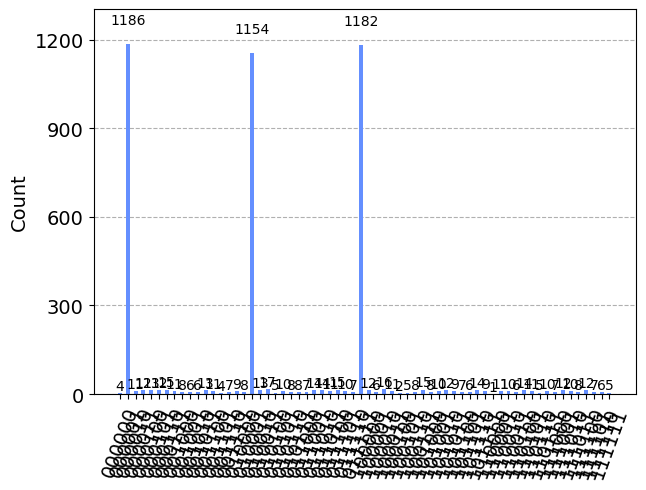

In [14]:
aer_sim = Aer.get_backend('aer_simulator')

result = execute(Grover(6,f([1, 17, 31]), 3), aer_sim,shots=4096).result()
# Here 6 is the number of qubits, not counting the auxiliary
statistics = result.get_counts()
plot_histogram(statistics)

# The values with the highest count are the marked items of the function, the solutions